In [1]:
pwd

'/Users/xinyuyan/Desktop/m5-forecasting-accuracy'

In [2]:
import os
import pandas as pd
import numpy as np
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')
from lightgbm import LGBMRegressor
import joblib

In [3]:
data = pd.read_pickle('data.pkl')

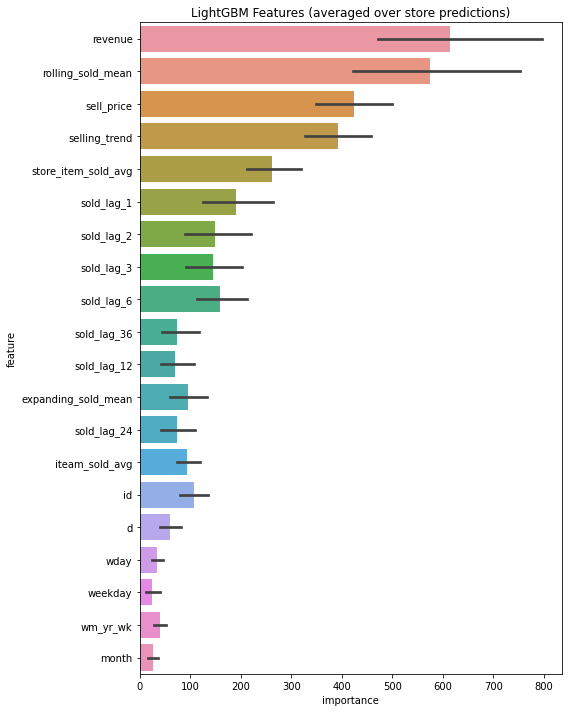

In [4]:
feature_importance_df = pd.DataFrame()
features = [f for f in data.columns if f != 'sold']
for filename in os.listdir('/Users/xinyuyan/Desktop/m5-forecasting-accuracy'):
    if 'model' in filename:
        # load model
        model = joblib.load(filename)
        store_importance_df = pd.DataFrame()
        store_importance_df["feature"] = features
        store_importance_df["importance"] = model.feature_importances_
        store_importance_df["store"] = filename[5:9]
        feature_importance_df = pd.concat([feature_importance_df, store_importance_df], axis=0)
    
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:20].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (averaged over store predictions)')
    plt.tight_layout()
    
display_importances(feature_importance_df)

In [5]:
X_train, y_train = data[data['d']<1914].drop('sold',axis=1), data[data['d']<1914]['sold']
X_valid, y_valid = data[(data['d']>=1914) & (data['d']<1942)].drop('sold',axis=1), data[(data['d']>=1914) & (data['d']<1942)]['sold']
X_test = data[data['d']>=1942].drop('sold',axis=1)

In [6]:
X_train=X_train.dropna()

In [7]:
import shap

In [ ]:
summary = shap.kmeans(X_train, 10)
explainer = shap.TreeExplainer(model.predict, summary)
shap_values = explainer.shap_values(X_train.values)